# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 데이터 전처리!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 두 번째 마을 '데이터 전처리' 마을에 도착했습니다.
* 그럼, 지금부터 두 번째 드래곤볼을 찾아볼까요?

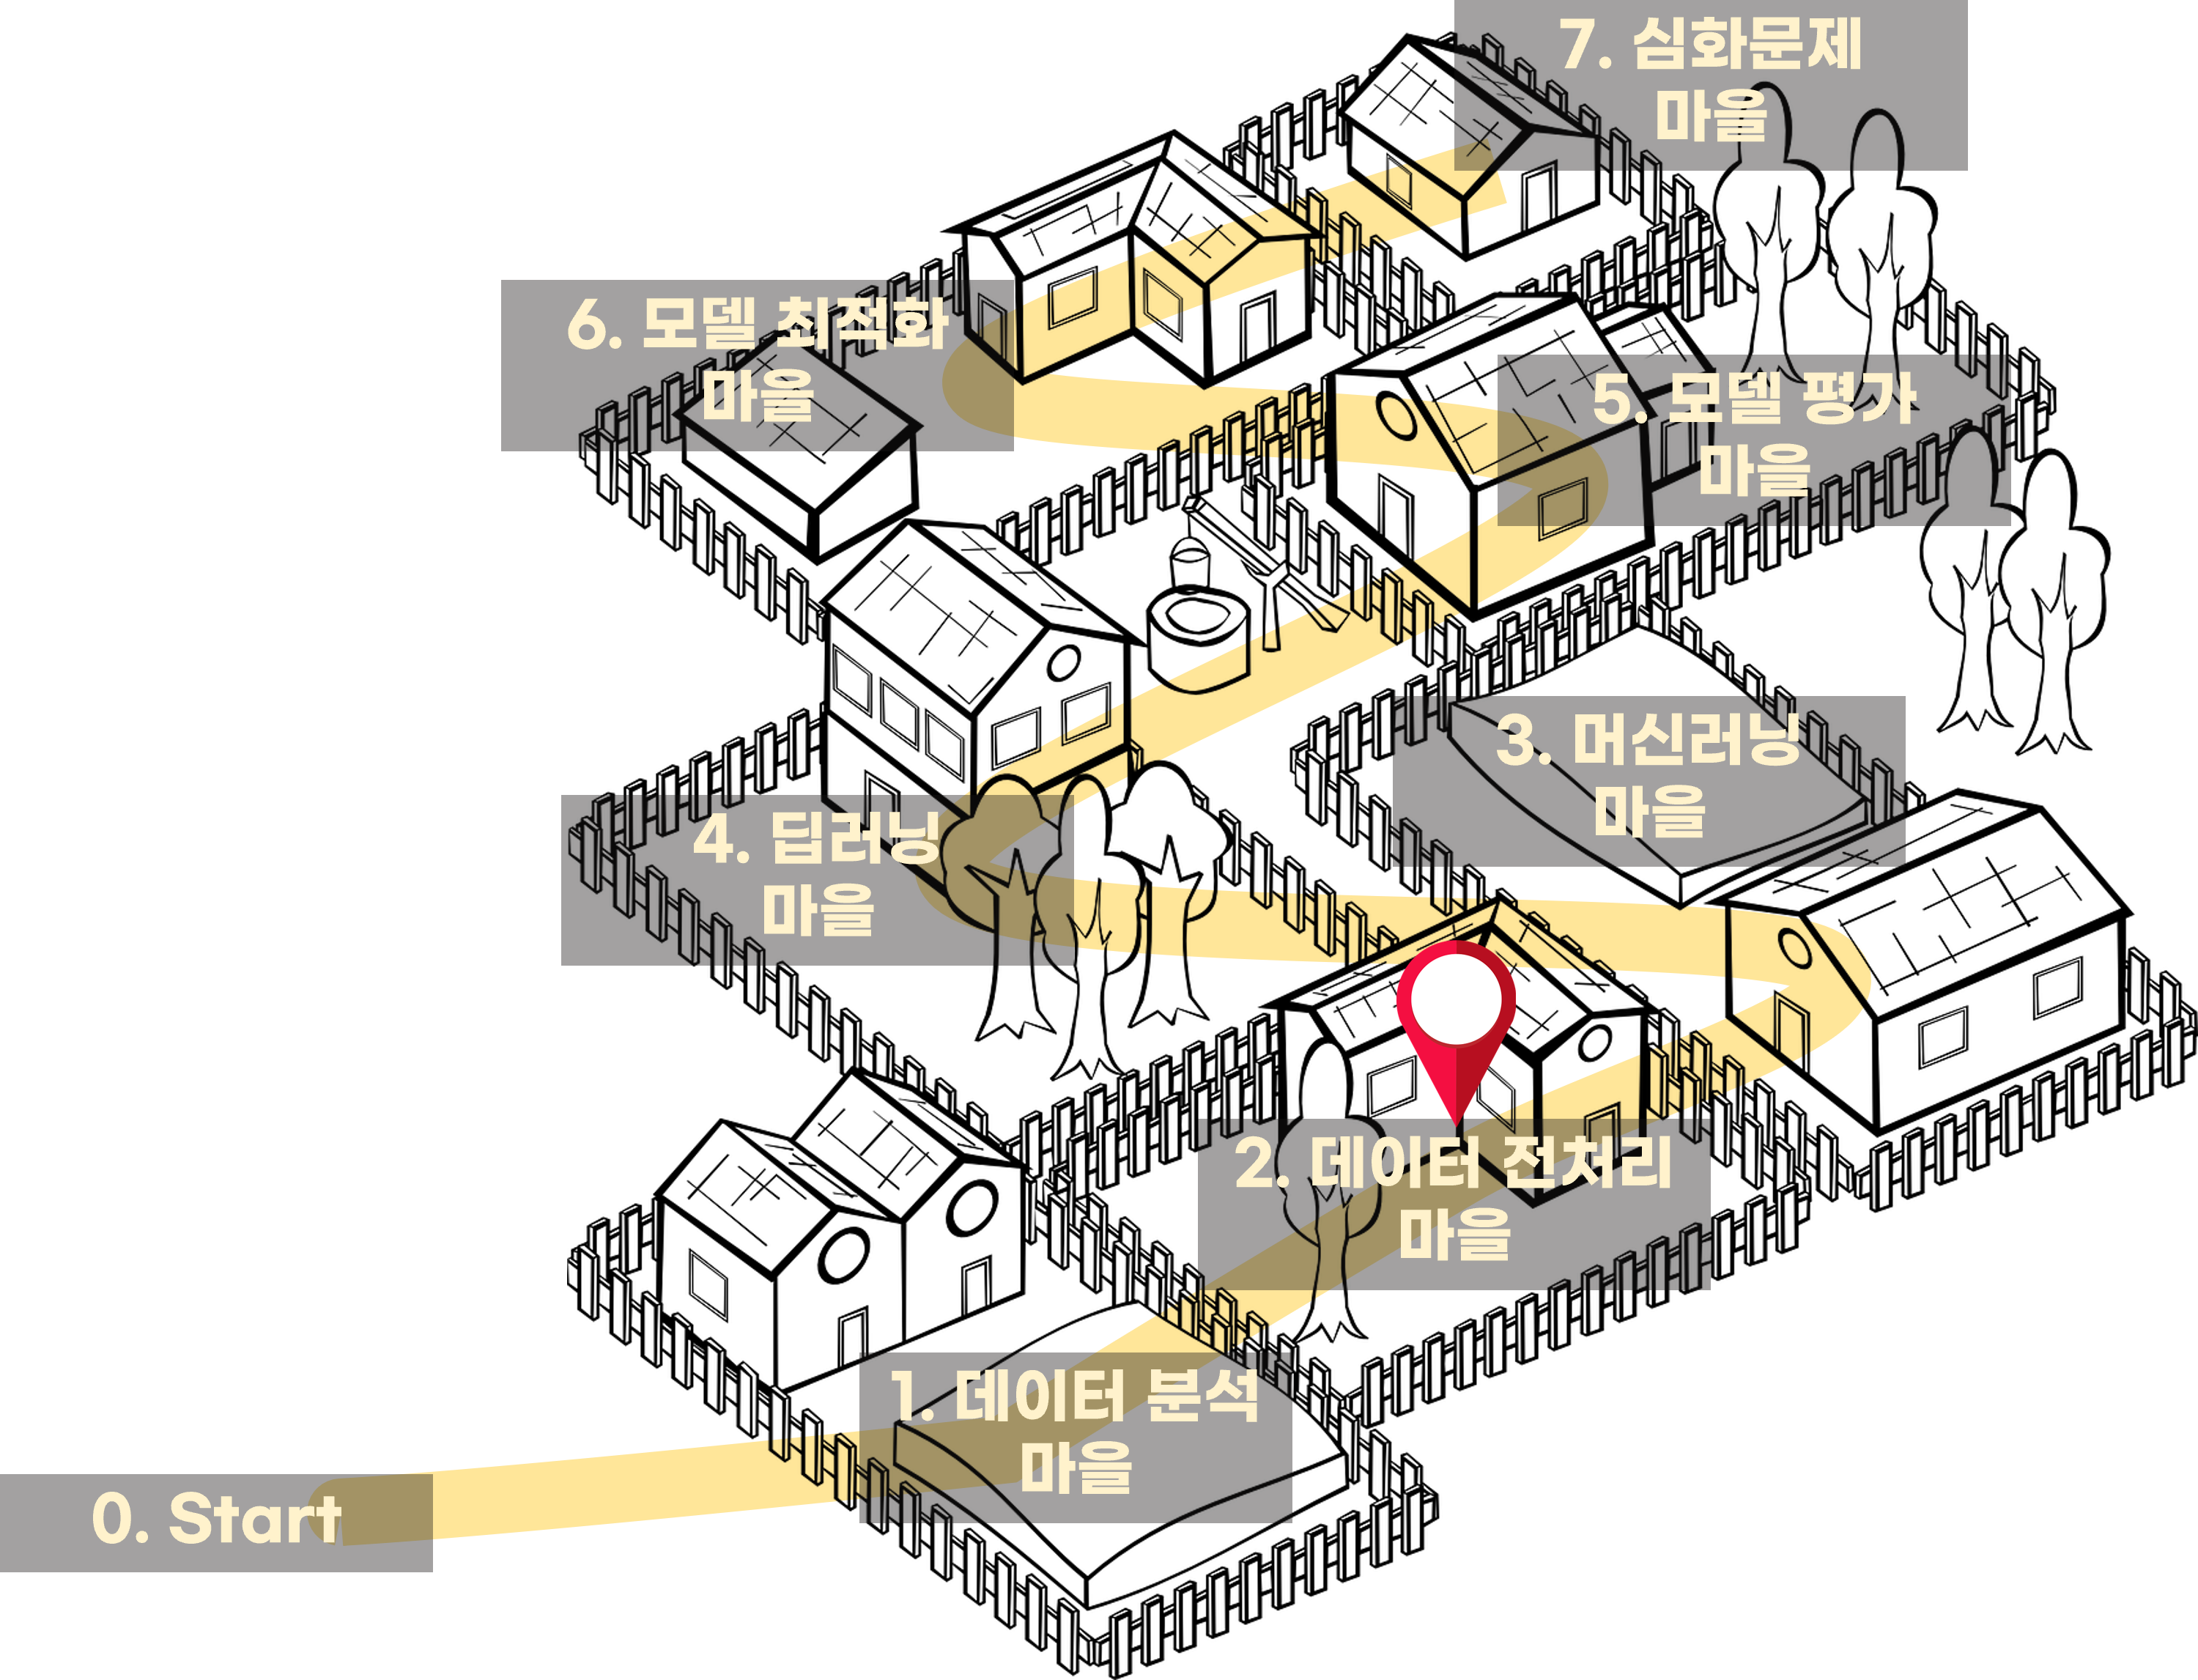

### [상황] 두 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [39]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn gspread oauth2client

In [40]:
# ID를 입력해주세요.
ID = "finalTest"

---

# (실습준비) 데이터 불러오기부터

In [75]:
import pandas as pd

# 학습/평가 데이터 로딩
df = pd.read_csv('raw_data/onenavi_train.csv',sep="|")
df_eval = pd.read_csv('raw_data/onenavi_evaluation.csv',sep="|")

# 데이터 합치기
df_total = pd.concat([df,df_eval])

In [76]:
df_total.shape

(109642, 7)

In [43]:
del_et = df_total.loc[df_total['ET']>=15000,:]
df_total.drop(del_et.index,inplace=True)

df_total.loc[df_total['ET']>=15000,:]

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA


In [44]:
df_total.shape

(109638, 7)

---

# 1. 이상치/결측치 처리
## Trash를 판별하는 능력은 좋은 AI모델을 만드는 데 있어 핵심입니다.
+ KeyPoint : 데이터의 형태를 살펴보고 불필요한 데이터를 정제할 수 있다.

[참고] 공식 Document
+ fillna(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
+ dropna(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

### 가. 결측치 처리

#### [실습문제1] 결측치 처리_1
* df_total의 결측치를 확인하고 결측치가 존재한다면 제거해주세요.
* 단서 : df_total의 결측치 갯수는?

In [45]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_total.isnull().sum()




RID                   0
TIME_DEPARTUREDATE    0
TIME_ARRIVEDATE       0
A_DISTANCE            0
ET                    0
ETA                   0
ETAA                  0
dtype: int64

In [46]:
# 아래에 단서를 적어주세요.
단서1 = "0"# 단서1을 적어주세요.(문자형으로 적어주세요.)

#### [실습문제2] 결측치 처리_2
* 아래 샘플데이터에서 결측치를 바로 앞의 값으로 채우기를 해주세요.
* 단서 : 결측치 처리를 하는 'fillna' 함수에서 앞의 값으로 채우기 할 때 사용하는 method는?

In [47]:
# 샘플테이블 생성
import pandas as pd
import numpy as np

sample = pd.DataFrame(
        {
            'column1':[30,70,np.nan,55],
            'column2':[22,50,88,np.nan]
        })

In [48]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sample.fillna(method='pad')




,column1,column2
0,30.0,22.0
1,70.0,50.0
2,70.0,88.0
3,55.0,88.0


In [49]:
# 아래에 단서를 적어주세요.
단서2 = "pad"# 단서2를 적어주세요.(문자형으로 적어주세요.)

### 나. 이상치 처리
#### 이상치(Outlier)는 전적으로 연구자 혹은 개발자가 판단을 해야한다. 자세히 살펴보지않으면 놓치기 쉽상이다.
#### "자세히 보아야 드러난다. 오래 보아야 도움이 된다. Outlier가 그렇다."

In [50]:
# 시각화 한글폰트 설정
import seaborn as sns

sns.set(font="NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제3] 이상치 처리_1
* 변수 df_total에서 'ET'를 Y축, 'A_DISTANCE'를 X축으로 Scatter Plot을 그려보면 특이하게 분포에서 멀어져있는 데이터들이 있습니다. 'ET' 기준 15,000초 이상인 데이터를 제거해주세요.
* 단서 : 'ET' 기준 15,000초 이상인 데이터 수는?

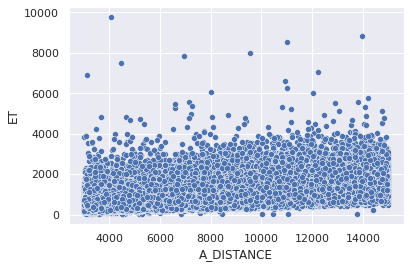

In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.(Scatter Plot 그리기)
import seaborn as sns

ax = sns.scatterplot(x=df_total['A_DISTANCE'], y=df_total['ET'], palette = "RdBu")



In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.(15,000초 이하 데이터만 남기기)
print(len(df_total[df_total['ET']>15000]))

df_total=df_total[df_total['ET']<=15000]

0


In [53]:
df_total.shape

(109638, 7)

In [54]:
# 아래에 단서를 적어주세요.
단서3 = "2"# 단서3을 적어주세요.(문자형으로 적어주세요.)

#### [실습문제4] 이상치 처리_2
* 이상치를 탐색할 때는 숨겨진 데이터의 의미도 찾아볼 수 있어야합니다. 이상치를 다르게 이야기 하면 '이 데이터가 제대로 된 것인가?'에 대한 답이라고도 할 수 있는데요. 이를 위해서는 다각도로 이상치를 볼 수 있어야 합니다.
* 숨겨진 데이터의 의미를 찾는 하나의 Tip은 주어진 변수의 조합으로 새로운 변수를 만들어보는 시도랍니다. 새로운 변수를 보면 예전에는 볼 수 없었던 이상치들을 발견할 수도 있습니다.
1. 여기서는 평균 시속 변수(변수명 : PerHour)를 먼저 한 번 만들어볼게요. 참고로 속도는 거리 나누기 시간입니다.
   * 평균 시속 변수(변수명 : PerHour)를 만들 때 참고 사항 : 'A_DISTANCE'의 단위는 'm(미터)'이고 'ET'의 단위는 '초'입니다.
   * (참고) 평균 시속 구하는 공식 : ('A_DISTANCE'/1000) / ('ET'/3600)
   * 평균 시속 변수(변수명 : PerHour)를 만들고 기초통계량을 확인하면 PerHour의 Max값이 이상하다는 사실을 발견하게 됩니다.
2. PerHour 기준으로 130km/h 이상의 수치는 제거해주세요.
* 단서 : PerHour의 Max 값은?(소수점 6번째자리까지)

In [55]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_total['PerHour']=(df_total['A_DISTANCE']/1000)/(df_total['ET']/3600)

df_total.describe()

,A_DISTANCE,ET,ETA,ETAA,PerHour
count,109638.000000,109638.000000,109638.000000,109638.000000,109638.000000
mean,7082.240154,967.721248,891.535530,81.175390,30.166803
std,3268.837573,507.369332,411.463475,16.175702,23.959913
min,3000.000000,7.113000,9.585180,0.000000,1.491505
25%,4302.000000,600.457230,593.558289,73.615821,19.803548
50%,6223.000000,881.533997,809.801147,85.038288,26.726096
75%,9359.000000,1200.540985,1109.804016,93.244994,36.520389
max,15000.000000,9782.602539,4264.188965,99.999899,3574.445236


In [56]:
df_total=df_total[df_total['PerHour']<=130]

In [57]:
# 아래에 단서를 적어주세요.
단서4 = "3574.445236"# 단서4를 적어주세요.(문자형으로 적어주세요.)

In [58]:
df_total.shape

(109578, 8)

---

### 이제는 추가변수를 추가하고 진행해볼게요.

In [59]:
# 추가 변수 데이터 로딩
df_pnu = pd.read_csv('raw_data/onenavi_pnu.csv',sep="|")
df_signal = pd.read_csv('raw_data/onenavi_signal.csv',sep="|")

# 데이터 합치기
df_total = pd.merge(df_total,df_pnu, on = 'RID')
df_total = pd.merge(df_total,df_signal, on = 'RID')

In [60]:
df_total.shape

(109267, 11)

---

#### [실습문제5] 이상치 처리_3
* 변수 df_total에서 'level1_pnu' 변수를 기준으로 CountChart를 그려보면 우리가 처음 전달받았던 데이터 기준과 다르다는 것을 알 수 있습니다. 수도권(서울, 경기, 인천) 데이터만 남기고 나머지는 제거해주세요.
* 단서 : 이상치 제거 후 df_total의 행(데이터) 수는?

C:\Users\jg311\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jg311\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jg311\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jg311\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jg311\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jg311\anaconda3\

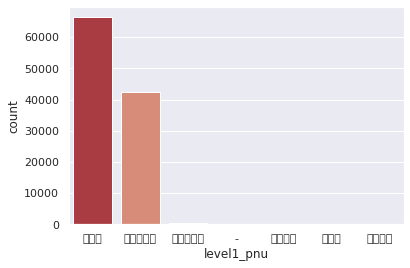

In [61]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.(CountChart 그리기)
import seaborn as sns

ax = sns.countplot(x=df_total['level1_pnu'], palette = "RdBu")

In [62]:
df_total.shape

(109267, 11)

In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.(수도권 데이터만 남기기)
print(df_total['level1_pnu'].unique())

df_total=df_total[(df_total['level1_pnu']=='서울특별시')|(df_total['level1_pnu']=='경기도')|(df_total['level1_pnu']=='인천광역시')]
df_total=df_total.reset_index(drop=True)
print(len(df_total))
print(df_total['level1_pnu'].unique())

['경기도' '서울특별시' '인천광역시' '-' '충청북도' '강원도' '충청남도']
109173
['경기도' '서울특별시' '인천광역시']


In [64]:
# 아래에 단서를 적어주세요.
단서5 = "109175"# 단서5를 적어주세요.(문자형으로 적어주세요.)

---

# 2. 더미변수 생성
## 범주형 데이터도 모델링에 활용할 수 있어야 합니다. 이를 위해 더미변수로 변환해주어야 합니다.
+ KeyPoint : 범주형 변수를 더미변수로 변환할 수 있다.

#### [실습문제6] 더미변수 생성
* 요일, 시간, 날짜 변수를 추가하고 요일, 시간, level1_pnu, level2_pnu를 더미변수로 만들어봅시다.
1. 먼저 요일, 시간, 날짜 변수를 'TIME_DEPARTUREDATE'에서 분리하고 변수를 만들어주세요.(하단의 소스코드 실행)
2. 이때 변수명은 요일 : WEEKDAY, 시간 : HOUR, 날짜 : DAY로 지정(하단의 소스코드 실행)
3. 그리고 WEEKDAY, HOUR, level1_pnu, level2_pnu를 더미변수로 만들어주세요.
4. 더미변수 생성 이후에는 원래 있었던 WEEKDAY, HOUR, level1_pnu, level2_pnu 변수를 제거해주세요.
* 단서 : 더미변수 생성 후 df_total의 열(변수) 수는?

In [65]:
# 먼저 요일, 시간, 날짜 변수를 'TIME_DEPARTUREDATE'에서 분리하고 변수를 만드는 소스코드
from dateutil.parser import parse
from tqdm import tqdm

weekday_list=[]
hour_list=[]
day_list=[]

for w in tqdm(df_total['TIME_DEPARTUREDATE']):
    parse_data_w=parse(w)
    weekday_list.append(parse_data_w.weekday())
    hour_list.append(parse_data_w.hour)
    day_list.append(parse_data_w.day)
    
df_total['WEEKDAY'] = weekday_list
df_total['HOUR'] = hour_list
df_total['DAY'] = day_list

100%|███████████████████████████████████████████████████████████████████████| 109173/109173 [00:08<00:00, 13389.43it/s]


In [66]:
# 아래에 실습코드를 작성하고 결과를 확인합니다
dummy_fields = ['WEEKDAY','HOUR','level1_pnu','level2_pnu']

for dummy in dummy_fields:
    dummies = pd.get_dummies(df_total[dummy], prefix=dummy, drop_first=False)
    df_total = pd.concat([df_total, dummies], axis=1)
    
df_total = df_total.drop(dummy_fields,axis=1)
df_total.shape

(109173, 115)

In [67]:
# 아래에 단서를 적어주세요.
단서6 = "115"# 단서6을 적어주세요.(문자형으로 적어주세요.)

---

### 나중에 모델 평가를 위해서 데이터 일부를 별도로 저장하고 넘어갈게요.

In [68]:
# 평가데이터 별도 저장 : 원본 기준(나중에 활용)
import os
 
if not os.path.exists("add_data"):
    os.makedirs("add_data")
    
new_df_eval=df_total[df_total['DAY']>=27][['ET','ETAA','A_DISTANCE']]
new_df_eval.to_csv("add_data/onenavi_evaluation_et.csv",sep="|",index=False)

---

# 3. 데이터 스케일링
##  Feature들의 크기, 범주를 정규화하는 과정을 통해 특정변수의 영향도를 조정해줄 수 있습니다.
+ KeyPoint : 데이터 스케일링을 통해 AI모델 학습에 도움을 줄 수 있다.

#### [실습문제7] 데이터 스케일링
* df_total을 MinMaxScaler로 데이터 스케일링을 진행하고 feature 변수로 저장해주세요.
1. 스케일링 이후에 데이터 분리를 위해서 df_total의 'DAY'만 data_day로 저장해주세요.
2. 'df_total'변수에서 학습에 활용하지 않을 'RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE','ET','ETAA','PerHour','DAY'는 제거하고 'scale_data'에 저장해주세요.
3. 스케일링을 하면 결과가 numpy 배열로 나옵니다. 이를 데이터 프레임으로 변경하면 Column 명을 확인할 수 없는데요. 이를 위해서 'scale_data'의 컬럼명을 'columnNames'에 별도로 저장해두세요.
4. 'scale_data'를 (0과 1 사이)MinMaxScaler로 스케일링 하고 각각 'feature' 변수로 DataFrame으로 변경 후 저장해주세요.
5. 'feature'의 컬럼명을 'columnNames'으로 지정해주세요.
6. 'feature'에 'DAY' 컬럼으로 data_day을 추가해주세요.
7. 'feature'(\~24일)는 'train_feature'변수로 'feature'(27일\~)는 'evaluation_feature' 변수로 분리 해주세요.
8. 'train_feature'와 'evaluation_feature' 변수의 'DAY' 컬럼을 제거해주세요.
* 단서 : train_feature 열(변수) 수는?

In [69]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.preprocessing import MinMaxScaler

data_day=df_total['DAY']

scale_data=df_total.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE','ET','ETAA','PerHour','DAY'],axis=1)
columnNames=scale_data.columns

scaler = MinMaxScaler(feature_range=(0, 1))
feature = pd.DataFrame(scaler.fit_transform(scale_data))
feature.columns=columnNames

# 다시 날짜를 합칠께요 : Train/Evaluation 분리를 위해 
feature['DAY']=data_day

# traindata 지정
train_feature=feature[feature['DAY']<=24]
evaluation_feature=feature[feature['DAY']>=27]
train_feature=train_feature.drop(['DAY'],axis=1)
evaluation_feature=evaluation_feature.drop(['DAY'],axis=1)

In [70]:
train_feature.shape, evaluation_feature.shape

((55433, 108), (53740, 108))

In [71]:
# 아래에 단서를 적어주세요.
단서7 = "108"# 단서7을 적어주세요.(문자형으로 적어주세요.)

---

## 다음 단계를 위해서 데이터를 저장하겠습니다.

In [72]:
# CSV로 저장
train_feature.to_csv('add_data/onenavi_train_feature.csv',index = False,sep='|')
df_total[df_total['DAY']<=24]['ET'].to_csv('add_data/onenavi_train_target.csv',index = False,sep='|')
evaluation_feature.to_csv('add_data/onenavi_evaluation_feature.csv',index = False,sep='|')

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 찾았습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [73]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.secondModule(ID, 단서1, 단서2, 단서3, 단서4, 단서5, 단서6, 단서7)

단서1 정답
단서2 정답
단서3 정답
단서4 정답
단서5 정답
단서6 정답
단서7 정답
드래곤볼을 획득했습니다.


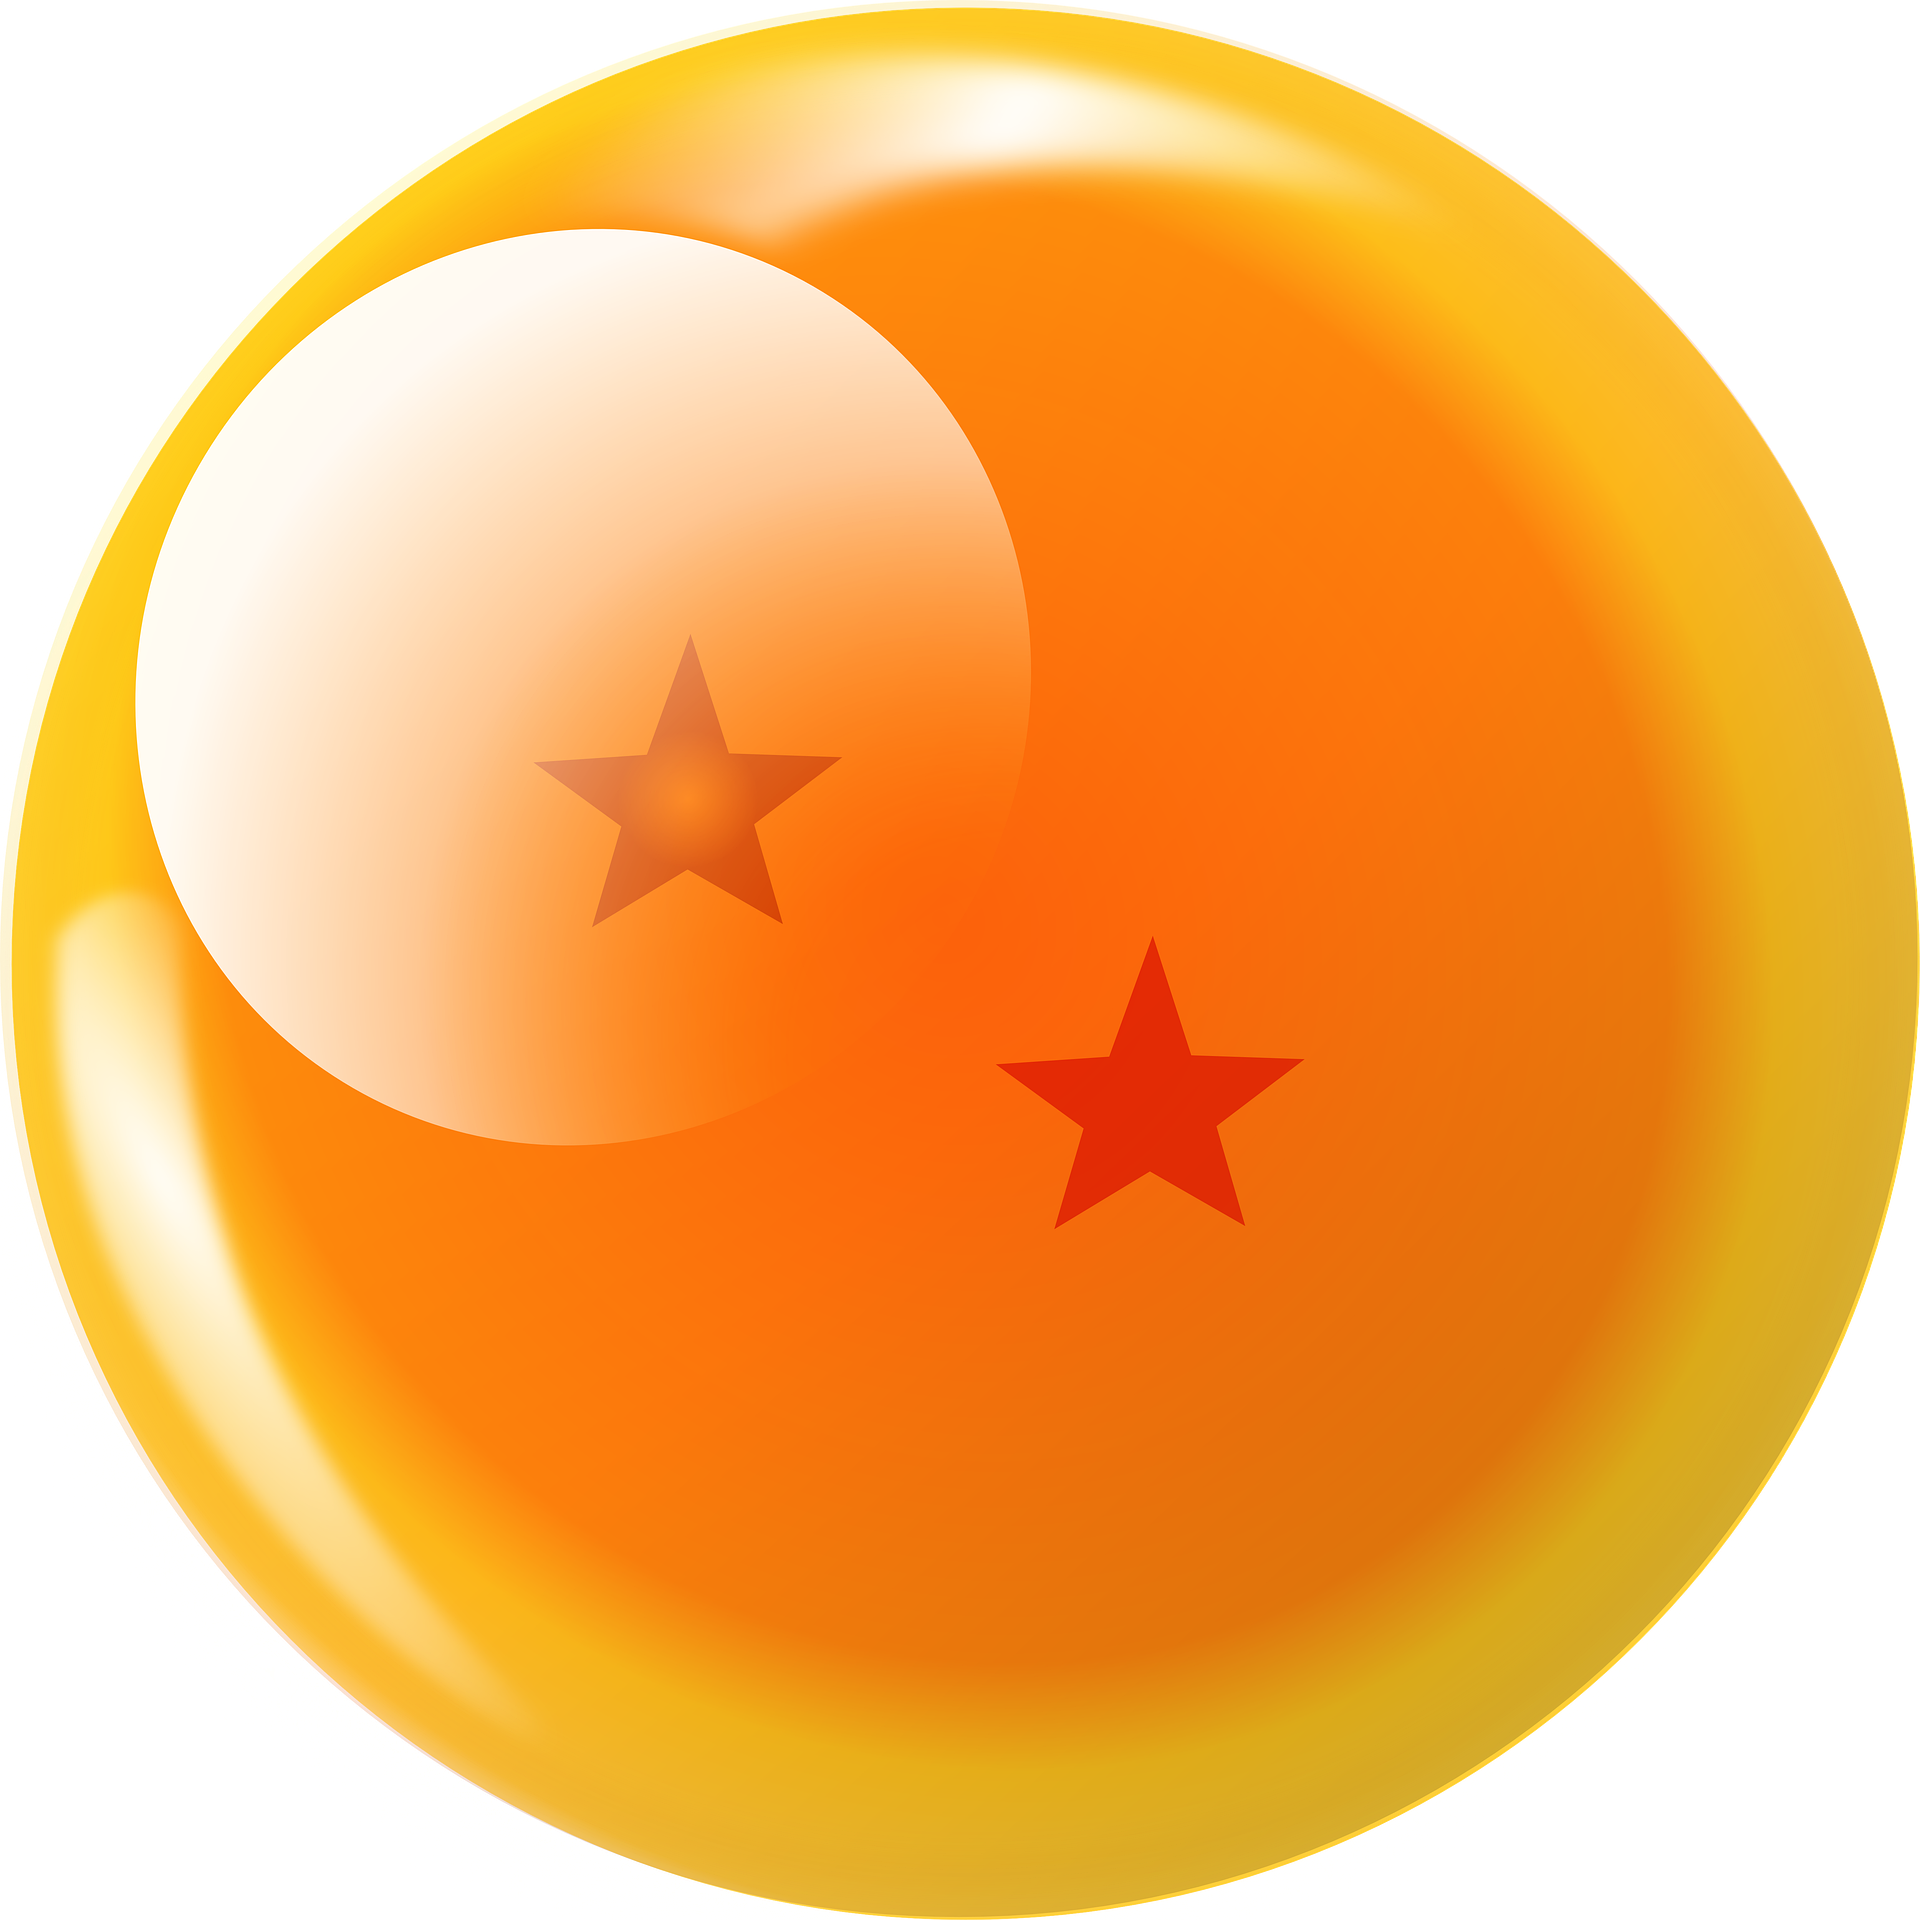

In [74]:
# 확인
from IPython.display import Image
Image("./dragonball/2성구.png", width=300, height=300)